# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:  
https://www.kaggle.com/datasets/victorsoeiro/hulu-tv-shows-and-movies  
https://www.kaggle.com/datasets/victorsoeiro/amazon-prime-tv-shows-and-movies  
https://www.kaggle.com/datasets/victorsoeiro/hbo-max-tv-shows-and-movies  
https://www.kaggle.com/datasets/victorsoeiro/paramount-tv-shows-and-movies  
https://www.kaggle.com/datasets/victorsoeiro/disney-tv-shows-and-movies  
https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies  

Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#In the checkpoint 2, I merged the data into 2 dataframes with the service each entry pulled from in a separate column. I also saved those out as csv so that I could use them going forward.
titles_df = pd.read_csv(r"C:\Users\lizzc\Desktop\LaunchCode\VideoStreamingData\VideoStreamingProject\title_df.csv")
credits_df = pd.read_csv(r"C:\Users\lizzc\Desktop\LaunchCode\VideoStreamingData\VideoStreamingProject\credits_df.csv")

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [3]:
#Checking for nulls to see where data might be missing.
titles_df.isnull().sum() 

Unnamed: 0                  0
id                          0
title                       1
type                        0
description               181
release_year                0
age_certification       12838
runtime                     0
genres                      0
production_countries        0
seasons                 19198
imdb_id                  2133
imdb_score               2721
imdb_votes               2762
tmdb_popularity           792
tmdb_score               3425
service                     0
dtype: int64

##### Missing titles_df info
- The missing title might be a problem, but it's only one, so I will probably just drop the record.
- Missing descriptions shouldn't cause an issue.
- Age certifications didn't exist before a certain year, so I suspect a lot of that missing data is from older films and shows. There are also exceptions to the ratings. I'll take a peak at a distribution of those nulls against the release year.
- Seasons aren't a thing for movies or limited release, so it makes sense that there are a lot of nulls there.
- I am curious to see if there are many entries missing both tmdb and imdb ratings - if so, those might be worth dropping as they're not likely to be something people are seeking a service to watch.


In [4]:
#Viewing the movie without a title.
titles_df[titles_df['title'].isna()]

,Unnamed: 0,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service
18903,1805,tm1063792,NaN,MOVIE,NaN,2015,NaN,11,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN,Netflix


In [5]:
#Dropping the movie without title.
titles_df = titles_df.drop(index=18903)

In [6]:
#Dropping unnamed column leftover from combining the tables.
titles_df = titles_df.drop(columns="Unnamed: 0")

In [7]:
titles_df.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,Amazon
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,Amazon
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8,Amazon


<AxesSubplot:>

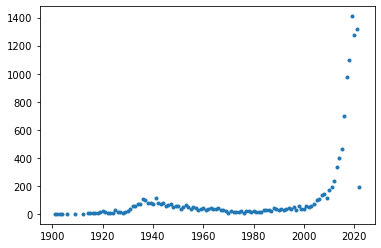

In [8]:
null_ac_year_counts = titles_df[titles_df['age_certification'].isna()].release_year.value_counts()

null_ac_year_counts.plot(style='.')
#It looks like there are a lot more recent shows without age certifications than I realized. It will be worth keeping in mind for anlysis on that section, but I don't plan to drop anything for it right now.

In [9]:
titles_df.type.value_counts()


MOVIE    19197
SHOW      6531
Name: type, dtype: int64

In [10]:
#Checking to see where the age_certification is missing. Looks like all tv shows have one.
titles_df[titles_df['age_certification'].isna() & titles_df['type']=="SHOW"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service


In [11]:
titles_df[titles_df['age_certification'].isna() & titles_df['type']=="MOVIE"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service


In [12]:
#It looks like Amazon has by far the most of the shows or movies that don't have any presence on imdb or tmdb. Might check that out to see what kind of data that represents.
titles_df[(titles_df['imdb_score'].isna())&(titles_df['tmdb_score'].isna())&(titles_df['tmdb_popularity'].isna())].groupby('service').count()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
service,,,,,,,,,,,,,,,
Amazon,219,219,219,150,219,19,219,219,219,52,216,0,0,0,0
Disney,2,2,2,0,2,0,2,2,2,1,1,0,0,0,0
HBO,13,13,13,10,13,0,13,13,13,4,11,0,0,0,0
Hulu,17,17,17,8,17,9,17,17,17,15,16,0,0,0,0
Netflix,9,9,9,8,9,5,9,9,9,4,6,0,0,0,0
Paramount,23,23,23,20,23,4,23,23,23,10,22,0,0,0,0


In [13]:
#I don't se much of a pattern here (checked head 30 and tail 30). It does look like a lot of these films may just be sleepers that most imdb/tmdb users wouldn't be familiar with. 

titles_df[(titles_df['imdb_score'].isna()) & 
            (titles_df['tmdb_score'].isna()) & 
            (titles_df['tmdb_popularity'].isna()) & 
            (titles_df['service'] == 'Amazon')].tail(30)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service
9705,tm1040925,Contract Lovers,MOVIE,After working undercover contracts in The Midd...,2021,NaN,79,['action'],[],NaN,tt3659988,NaN,NaN,NaN,NaN,Amazon
9707,tm1071158,Trackside Goons,MOVIE,When a Detective's son gets caught up in somet...,2021,NaN,70,['drama'],[],NaN,tt14806292,NaN,NaN,NaN,NaN,Amazon
9713,tm971295,Black Seeds: The History of Africans in America,MOVIE,An epic two-part documentary film that re-exam...,2021,NaN,70,['documentation'],[],NaN,tt12223626,NaN,NaN,NaN,NaN,Amazon
9722,tm1089294,The Noise in Music,MOVIE,Growing up in a musical family was magical for...,2021,NaN,141,[],[],NaN,tt15138130,NaN,NaN,NaN,NaN,Amazon
9727,tm956637,Rex Park: Curse of the Golden Buddha,MOVIE,After not being able to pay rent and owing mon...,2021,NaN,80,['comedy'],[],NaN,tt13273570,NaN,NaN,NaN,NaN,Amazon
9728,tm1123328,Mahadwaram: The Portal for Dead,MOVIE,Where do you go after you die? Is there a door...,2021,NaN,84,['horror'],[],NaN,tt15690444,NaN,NaN,NaN,NaN,Amazon
9729,tm1131747,Mia meets Morgenrot,MOVIE,"Mia, a young, attractive woman and mother star...",2021,NaN,101,[],[],NaN,NaN,NaN,NaN,NaN,NaN,Amazon
9730,tm1134981,CIRCLES vol 1,MOVIE,NaN,2021,NaN,82,['romance'],[],NaN,tt15768670,NaN,NaN,NaN,NaN,Amazon
9735,tm1120115,Death and All His Friends,MOVIE,"Sean is planning to end his life, but first he...",2021,NaN,81,['drama'],[],NaN,tt12576128,NaN,NaN,NaN,NaN,Amazon
9740,tm1122412,Chinna Chinni Asha,MOVIE,An aspiring film maker and a happy but introve...,2021,NaN,75,"['drama', 'romance']",[],NaN,tt15601432,NaN,NaN,NaN,NaN,Amazon


In [14]:
# I dropped shows without a score, since it's impossible to get a feel for how well they have done without that data.
index_names = titles_df[(titles_df['imdb_score'].isna())&(titles_df['tmdb_score'].isna())&(titles_df['tmdb_popularity'].isna())].index

titles_df.drop(index_names, inplace = True)

In [15]:
#Dropping unnamed column leftover from combining the tables.
credits_df = credits_df.drop(columns="Unnamed: 0")

In [16]:
credits_df.head(3)

,person_id,id,name,character,role,service
0,59401,ts20945,Joe Besser,Joe,ACTOR,Amazon
1,31460,ts20945,Moe Howard,Moe,ACTOR,Amazon
2,31461,ts20945,Larry Fine,Larry,ACTOR,Amazon


In [17]:
#Checking for nulls to see where data might be missing.
credits_df.isnull().sum() 

person_id        0
id               0
name             0
character    37401
role             0
service          0
dtype: int64

In [18]:
credits_df.role.value_counts()

ACTOR       345327
DIRECTOR     20570
Name: role, dtype: int64

In [19]:
#It looks like there are 16831 unnamed characters for actor entries in the data. Not going to drop those, but good to know.
credits_df[credits_df.character.isnull()].role.value_counts()

DIRECTOR    20570
ACTOR       16831
Name: role, dtype: int64

In [20]:
titles_df.isnull().sum() 

id                          0
title                       0
type                        0
description                93
release_year                0
age_certification       12591
runtime                     0
genres                      0
production_countries        0
seasons                 19000
imdb_id                  2122
imdb_score               2437
imdb_votes               2478
tmdb_popularity           508
tmdb_score               3141
service                     0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [21]:
# Looking for outliers with describe function.
titles_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,25445.000000,25445.000000,6445.000000,23008.000000,2.296700e+04,24937.000000,22304.000000
mean,2004.605659,78.315661,2.973313,6.327503,2.579403e+04,17.034625,6.463338
std,23.409396,36.593429,4.058912,1.284747,1.034987e+05,92.784858,1.388367
min,1901.000000,0.000000,1.000000,1.000000,5.000000e+00,0.000011,0.500000
25%,2002.000000,49.000000,1.000000,5.500000,2.190000e+02,1.841000,5.700000
50%,2015.000000,85.000000,2.000000,6.400000,1.219000e+03,4.625000,6.600000
75%,2019.000000,101.000000,3.000000,7.300000,7.927500e+03,12.233000,7.400000
max,2022.000000,540.000000,63.000000,9.900000,2.555504e+06,9323.832000,10.000000


##### Of note:
25% for release year is 2002, but minimum year there is 1901. Might be interesting to check what the spread is on the lower end.
There appears to be something with a 0 minute run time. That's curious. 540 minutes is also impressively long.
I also might glance at the distribution of the scores and popularity/votes.


<AxesSubplot:>

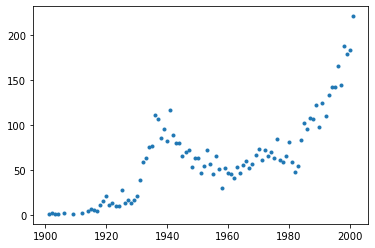

In [22]:
# This is pretty much within what I expected. Looks like a little pop up in the number of movies from the 40s, then a pretty normal upward curve as it approaches the modern era.
x = titles_df[(titles_df['release_year'] < 2002)].release_year.value_counts()
x.plot(style='.')

<AxesSubplot:>

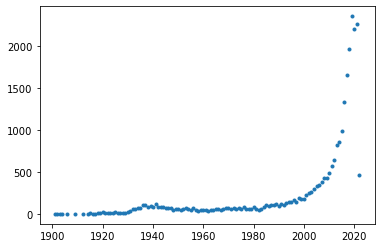

In [23]:
# Without the 2002 limit, the curve is even more as expected with many more movies at the higher end. Since the data is from May 2022, the 2022 data is obviously a little funky there.
x = titles_df.release_year.value_counts()
x.plot(style='.')

<AxesSubplot:>

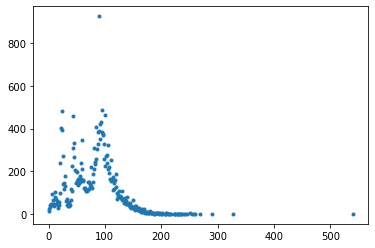

In [24]:
# Looks like there are a couple outliers on the above 300 minutes side. 
# There are also a surprising number on the lower end. Might zoom in there.
x = titles_df.runtime.value_counts()
x.plot(style='.')

In [25]:
titles_df[(titles_df['runtime'] > 260)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service
904,tm111211,Custer's Last Stand,MOVIE,Kit Cardigan seeks the killer of his father......,1936,NaN,328,"['western', 'history', 'romance', 'war']",['US'],NaN,tt0126256,4.7,235.0,0.945000,4.0,Amazon
3137,tm244078,Millennium,MOVIE,Mini series incorporating The Girl With the Dr...,2010,NaN,540,"['thriller', 'crime']",['SE'],NaN,NaN,NaN,NaN,0.001609,9.0,Amazon
5174,tm160196,Superfish,MOVIE,The KBS documentary program Superfish takes a ...,2013,NaN,290,[],[],NaN,NaN,NaN,NaN,0.600000,NaN,Amazon
7516,tm914979,On the Trail of UFOs,MOVIE,From the gates of Area 51 to the Hudson Valley...,2020,NaN,268,"['documentation', 'history']",['US'],NaN,tt14928972,5.8,40.0,0.616000,4.0,Amazon


<AxesSubplot:>

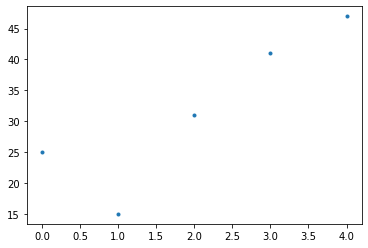

In [26]:
x = titles_df[(titles_df['runtime'] < 5)].runtime.value_counts()
x.plot(style='.')

In [27]:
# It looks like these are more on the shorts/web series end of things.
titles_df[(titles_df['runtime'] < 5)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service
1736,ts95763,Pinkfong! Halloween Songs,SHOW,It's time to celebrate Halloween with ghosts a...,1969,NaN,1,"['music', 'animation', 'family']",[],3.0,tt7818358,3.6,5.0,NaN,NaN,Amazon
2401,tm192899,Incognito,MOVIE,Harry Donovan is an art forger who paints fake...,1997,R,1,"['crime', 'thriller', 'romance']",['US'],NaN,tt0119365,6.4,3760.0,5.755,6.1,Amazon
2859,ts11540,Between Two Ferns with Zach Galifianakis,SHOW,Host Zach Galifianakis conducts celebrity inte...,2008,TV-14,4,['comedy'],['US'],1.0,tt1535002,8.4,8446.0,15.251,7.6,Amazon
2924,ts82184,Wallace & Gromit's Cracking Contraptions,SHOW,A look at some of Wallace's labour-saving mech...,2002,TV-G,1,"['comedy', 'animation', 'family', 'european']",['US'],1.0,tt0339881,7.6,2889.0,3.844,9.5,Amazon
3340,ts83160,Simon’s Cat,SHOW,Simon's cat follows the silent-movie-like adve...,2008,TV-Y,2,"['animation', 'comedy']",['GB'],14.0,tt2057193,8.1,617.0,2.746,8.4,Amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22891,ts296698,Glimpses of a Future,SHOW,A few weeks into the first COVID-19 lockdown i...,2021,TV-PG,4,[],[],1.0,tt14754320,NaN,NaN,0.600,NaN,Netflix
22903,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0,0.979,10.0,Netflix
24713,ts98077,Hack Into Broad City,SHOW,Hack Into Broad City is an exclusive web serie...,2014,NaN,1,['comedy'],['US'],2.0,tt7000350,8.5,304.0,0.632,NaN,Paramount
25239,ts92298,Resolutions,SHOW,After committing to some pretty ambitious New ...,2018,NaN,3,['comedy'],['US'],1.0,tt8732616,NaN,NaN,0.819,NaN,Paramount


In [28]:
# These look more like mistakes. For example, Dreamworks Happy Holidays from Madagascar has a 57 minute run time and Kung Fu Panda Awesome Secrets has a 30 minute run time according to IMDB.
titles_df[(titles_df['runtime'] == 0)]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service
16834,ts251161,Candy,SHOW,Candy Montgomery is a 1980 housewife and mothe...,2022,TV-MA,0,"['crime', 'drama', 'thriller']",['US'],1.0,tt13729648,7.2,301.0,36.775,NaN,Hulu
17570,ts74931,Kung Fu Panda Awesome Secrets,SHOW,"In this pair of adventures, Po tells the story...",2008,NaN,0,"['action', 'comedy', 'family', 'animation']",['US'],1.0,tt6963796,7.2,55.0,NaN,NaN,Netflix
17576,ts98252,Dreamworks Happy Holidays from Madagascar,SHOW,Madagascar goes wild with holiday spirit in th...,2005,TV-PG,0,"['animation', 'comedy', 'family']",['US'],1.0,tt6929194,6.5,96.0,3.420,NaN,Netflix
17659,ts67595,Pedro El Escamoso,SHOW,Pedro el escamoso is a popular telenovela film...,2001,TV-14,0,"['drama', 'comedy']",['CO'],1.0,tt0283770,7.5,303.0,46.411,7.8,Netflix
17994,ts99814,Masameer,SHOW,A popular Saudi animation show talks sarcastic...,2011,TV-MA,0,"['comedy', 'animation']",['SA'],1.0,tt6298258,8.2,677.0,NaN,NaN,Netflix
19716,ts74765,Daughters of Destiny,SHOW,Five girls from India's most impoverished fami...,2017,NaN,0,['documentation'],['IN'],1.0,tt1877895,8.6,900.0,2.385,7.7,Netflix
19725,ts94470,Relatable,SHOW,What happens when the '90s meets now? A group ...,2018,NaN,0,['comedy'],[],2.0,tt13281898,NaN,NaN,0.852,NaN,Netflix
20228,ts104093,Dance & Sing With True,SHOW,True and her friends are making music -- and t...,2018,NaN,0,"['animation', 'family']",[],1.0,tt9315892,NaN,NaN,1.960,10.0,Netflix
20263,ts250172,Afronta!,SHOW,Afronta invites contemporary black artists and...,2017,TV-PG,0,['documentation'],['BR'],1.0,tt12467250,7.4,8.0,0.600,NaN,Netflix
20850,ts268592,Beyblade Burst Rise,SHOW,"Beyblade Burst Rise, also known as Beyblade Bu...",2019,NaN,0,"['action', 'scifi', 'sport', 'thriller', 'anim...",['XX'],1.0,tt11916718,5.7,156.0,1.112,NaN,Netflix


In [29]:
# I'm not going to delete this data yet, but might at a later point. I will certainly drop 0 minute pieces for any runtime analysis.
titles_df[(titles_df['runtime'] < 10)].runtime.value_counts()

7    92
8    64
4    47
6    46
5    43
3    41
9    40
2    31
0    25
1    15
Name: runtime, dtype: int64

In [30]:
credits_df.describe()

,person_id
count,3.658970e+05
mean,3.969535e+05
std,5.643728e+05
min,1.000000e+00
25%,2.688800e+04
50%,1.031270e+05
75%,5.906760e+05
max,2.371585e+06


In [31]:
credits_df.head()

,person_id,id,name,character,role,service
0,59401,ts20945,Joe Besser,Joe,ACTOR,Amazon
1,31460,ts20945,Moe Howard,Moe,ACTOR,Amazon
2,31461,ts20945,Larry Fine,Larry,ACTOR,Amazon
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,Amazon
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,Amazon


In [32]:
# Who's got the most credits?
credits_df.person_id.value_counts()

529        156
18723      110
14142      109
20372      105
7997       102
          ... 
827163       1
46602        1
76543        1
486303       1
1856281      1
Name: person_id, Length: 168162, dtype: int64

In [33]:
# I'm surprised by how few of these names I know. Some are famous, but others... very busy character actors? Or older movies?
# It will be interesting to look at these with the data from the other table, but I plan to do that in the next checkpoint.
credits_df.name.value_counts().head(30)

Frank Welker                156
Dee Bradley Baker           110
Grey DeLisle                109
Tara Strong                 105
Kevin Michael Richardson    102
Jeff Bennett                 97
Fred Tatasciore              95
Jim Cummings                 89
Bess Flowers                 83
Tom Kenny                    80
George 'Gabby' Hayes         79
Samuel L. Jackson            75
Roy Rogers                   71
Takahiro Sakurai             70
John DiMaggio                69
Joseph Kane                  66
John Wayne                   63
Kath Soucie                  62
Rob Paulsen                  61
Tress MacNeille              60
Earl Dwire                   59
Danny Trejo                  59
Sam Newfield                 58
Jess Harnell                 57
Charles King                 57
Whoopi Goldberg              55
Nassar                       55
Yakima Canutt                55
Forrest Taylor               55
Herman Hack                  54
Name: name, dtype: int64

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [34]:
# Duplicates are likely across services as movies/shows can stream on multiple platforms. I'm going to check real quick if there are any full duplicates.
titles_df.duplicated().value_counts() 

False    25442
True         3
dtype: int64

In [35]:
# And here I'm checking for duplicates that might show up cross-services. Looks like 4339 are duplicated across services. I'll sample those to see what they look like.
titles_df.duplicated(['title', 'release_year', 'id'], keep = False).value_counts()

False    21106
True      4339
dtype: int64

In [36]:
# This isn't counting the first instance of each, so it's just a list. It looks pretty in line with what I'd expect - relatively popular stuff that's on mulitiple platforms.
titles_df[titles_df.duplicated(['title', 'release_year', 'id']) == True].sort_values("tmdb_popularity", ascending=False).head(20)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,service
17345,ts21469,Grey's Anatomy,SHOW,Follows the personal and professional lives of...,2005,TV-14,49,"['drama', 'romance']",['US'],18.0,tt0413573,7.6,293618.0,1215.393,8.3,Netflix
25367,tm374139,Sonic the Hedgehog,MOVIE,"Powered with incredible speed, Sonic The Hedge...",2020,PG,99,"['scifi', 'action', 'comedy', 'family', 'fanta...","['JP', 'US']",NaN,tt3794354,6.5,126887.0,893.650,7.4,Paramount
16840,tm434720,The King's Man,MOVIE,As a collection of history's worst tyrants and...,2021,R,131,"['thriller', 'action', 'war', 'crime', 'comedy']","['GB', 'US']",NaN,tt6856242,6.4,60394.0,559.090,6.9,Hulu
14718,ts20711,The Simpsons,SHOW,The satiric adventures of a working-class fami...,1989,TV-14,27,"['animation', 'comedy']",['US'],34.0,tt0096697,8.7,394764.0,516.381,7.9,Hulu
25626,tm460993,Clifford the Big Red Dog,MOVIE,As Emily struggles to fit in at home and at sc...,2021,PG,97,"['fantasy', 'comedy', 'family', 'animation', '...","['CA', 'GB', 'US']",NaN,tt2397461,5.9,11522.0,482.744,7.3,Paramount
25013,ts304703,S.W.A.T.,SHOW,Follows a locally born and bred S.W.A.T. serge...,2017,TV-14,42,"['crime', 'drama', 'thriller', 'action']",['US'],6.0,tt6111130,7.0,21813.0,439.647,8.1,Paramount
24145,ts6495,Criminal Minds,SHOW,An elite team of FBI profilers analyze the cou...,2005,TV-14,44,"['thriller', 'crime', 'drama']",['US'],15.0,tt0452046,8.1,189191.0,401.416,8.3,Paramount
17347,ts6495,Criminal Minds,SHOW,An elite team of FBI profilers analyze the cou...,2005,TV-14,44,"['thriller', 'crime', 'drama']",['US'],15.0,tt0452046,8.1,189191.0,401.416,8.3,Netflix
14396,tm460711,Free Guy,MOVIE,A bank teller called Guy realizes he is a back...,2021,PG-13,115,"['scifi', 'comedy', 'fantasy', 'action']",['US'],NaN,tt6264654,7.1,335518.0,398.516,7.7,HBO
16830,tm372685,Death on the Nile,MOVIE,Belgian sleuth Hercule Poirot boards a glamoro...,2022,PG-13,127,"['thriller', 'crime', 'drama']","['GB', 'US']",NaN,tt7657566,6.6,18325.0,386.008,6.5,Hulu


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

#### Capitalization
Not worried about capitilization for now. In most examples, the data looks relatively clean, and I don't want to accidentally introduce inconsistencies.  
Definitely plan to try out a bit of natural language processing on the descriptions. Not sure what level of cleaning I need to do for that to be useful, so I'm going to figure that out when I'm working with SpaCy.
#### Formats
The years could be put into date-time, but I don't see any particular benefits to doing it.
If the data were larger and speed/memory were a concern, I would probably shift at least votes, possibly popularity, columns to int. It's not really necessary for this.
#### Categorical values
It may be worth moving the age-certifications into a ordered category type to make charts clearer.  
Would love to be able to use genres as a category, but I don't think I can do that in its current form. Still figuring out how to efficiently use that column. (I did get a straight count of genres in Checkpoint 2, but don't know how I want to otherwise use it yet.) - Whatever I use for that is also replicable on the list in production countries.
#### Addresses
This isn't an item in this dataframe.

In [41]:
from pandas.api.types import CategoricalDtype

In [45]:
cat_type = CategoricalDtype(categories=["TV-Y", "TV-Y7", "G", "TV-G", "PG", "TV-PG", "PG-13", "TV-14", "R", "TV-MA", "NC-17"], ordered=True)
titles_df['age_certification'] = titles_df['age_certification'].astype(cat_type)

In [51]:
titles_df['age_certification'].value_counts().sort_index()

TV-Y      304
TV-Y7     366
G        1017
TV-G      362
PG       1713
TV-PG     791
PG-13    1925
TV-14    1565
R        3051
TV-MA    1721
NC-17      39
Name: age_certification, dtype: int64

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?  
Yes. I worked through a couple of things in each category.

2. Did the process of cleaning your data give you new insights into your dataset?  
I definitely saw some things I want to keep in mind going forward.

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?  
I need to watch the overlap between services. I might need to break out 2 separate dataframes - one in which I drop the services info and drop all duplicates to avoid skewing the data with the duplicates and one in which I keep it as is to look at differences between services.